In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


**We shall use regression in this case as the fare of taxi is numerical and regression algorithms help predict continuous variables**

In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.shape

(50000, 8)

In [8]:
#converting date_time_of_pickup to separate columns
import datetime

In [9]:
pd.to_datetime(df['date_time_of_pickup'])

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 50000, dtype: datetime64[ns, UTC]

In [10]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])-datetime.timedelta(hours=4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [12]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
df['date_time_of_pickup'].dt.month

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: date_time_of_pickup, Length: 50000, dtype: int64

In [14]:
df['year']=df['date_time_of_pickup'].dt.year
df['month']=df['date_time_of_pickup'].dt.month
df['day']=df['date_time_of_pickup'].dt.day
df['hours']=df['date_time_of_pickup'].dt.hour
df['minutes']=df['date_time_of_pickup'].dt.minute

In [15]:
def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

In [16]:
df["distance"]=distance(df.latitude_of_pickup,df.longitude_of_pickup,df.latitude_of_dropoff,df.longitude_of_dropoff)

In [17]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hours,minutes,distance
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26,0.640487
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52,5.250670
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35,0.863411
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30,1.739386
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51,1.242218


**Data Cleaning**

In [18]:
df.drop(['date_time_of_pickup','unique_id'],axis=1,inplace=True)

In [19]:
def clean_data(df):
    new_df=df[
        ((df['amount']>0)&(df['amount']<=200))&
        ((df['longitude_of_pickup']>-75)&(df['longitude_of_pickup']<-73))&
        ((df['latitude_of_pickup'] > 40) & (df['latitude_of_pickup'] < 42)) &
        ((df['longitude_of_dropoff']>-75)&(df['longitude_of_dropoff']<-72))&
        ((df['latitude_of_dropoff']>40)&(df['latitude_of_dropoff']<42))&
        ((df['no_of_passenger']>0)&(df['no_of_passenger']<=6))
    ]   
    return new_df

In [20]:
df=clean_data(df)

In [21]:
df.shape

(48785, 12)

In [22]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hours,minutes,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51,1.242218


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                48785 non-null  float64
 1   longitude_of_pickup   48785 non-null  float64
 2   latitude_of_pickup    48785 non-null  float64
 3   longitude_of_dropoff  48785 non-null  float64
 4   latitude_of_dropoff   48785 non-null  float64
 5   no_of_passenger       48785 non-null  int64  
 6   year                  48785 non-null  int64  
 7   month                 48785 non-null  int64  
 8   day                   48785 non-null  int64  
 9   hours                 48785 non-null  int64  
 10  minutes               48785 non-null  int64  
 11  distance              48785 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.8 MB


In [24]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
month                   0
day                     0
hours                   0
minutes                 0
distance                0
dtype: int64

**Data Understanding**

C:\Users\digan\AppData\Local\Temp\ipykernel_3876\2148976157.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


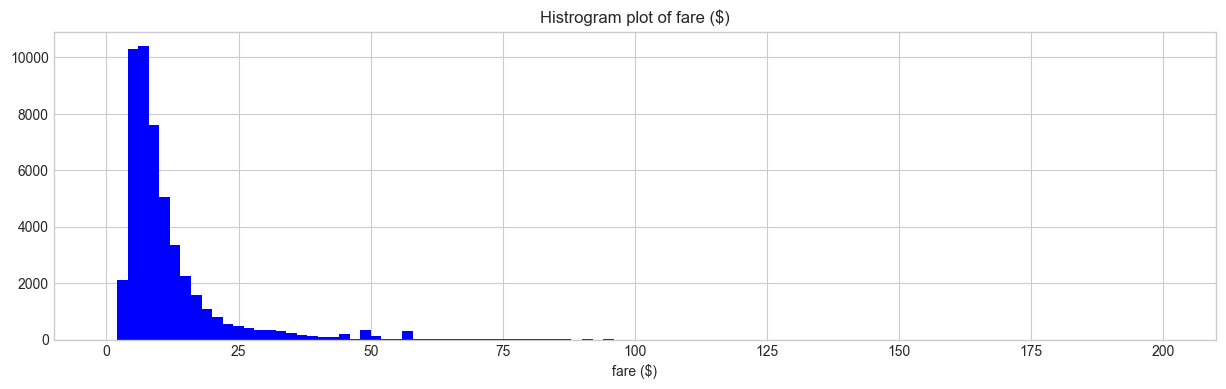

In [25]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

plt.hist(df['amount'], bins=100, color='blue')
plt.xlabel("fare ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

Text(0.5, 1.0, 'Histogram of no of Passengers')

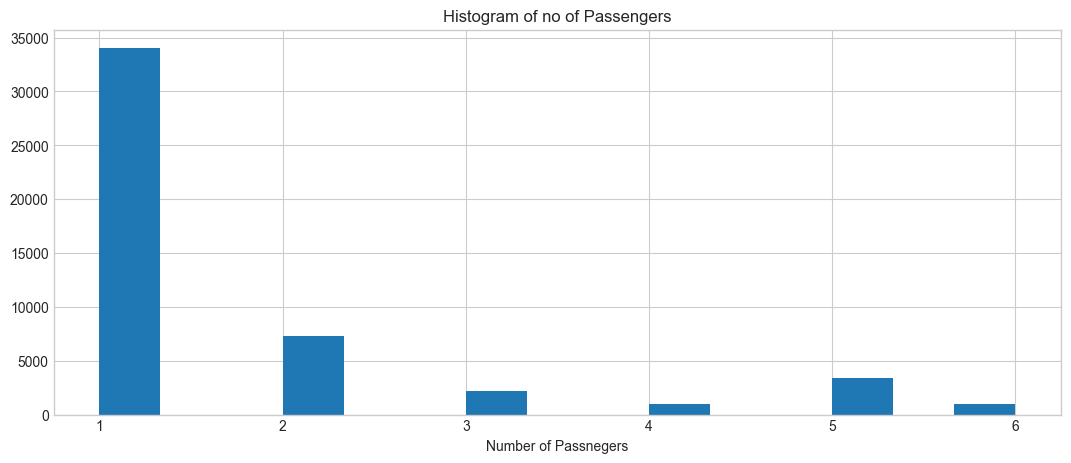

In [26]:
df.no_of_passenger.hist(bins = 15,figsize=(13,5))
plt.xlabel('Number of Passnegers')
plt.title('Histogram of no of Passengers')

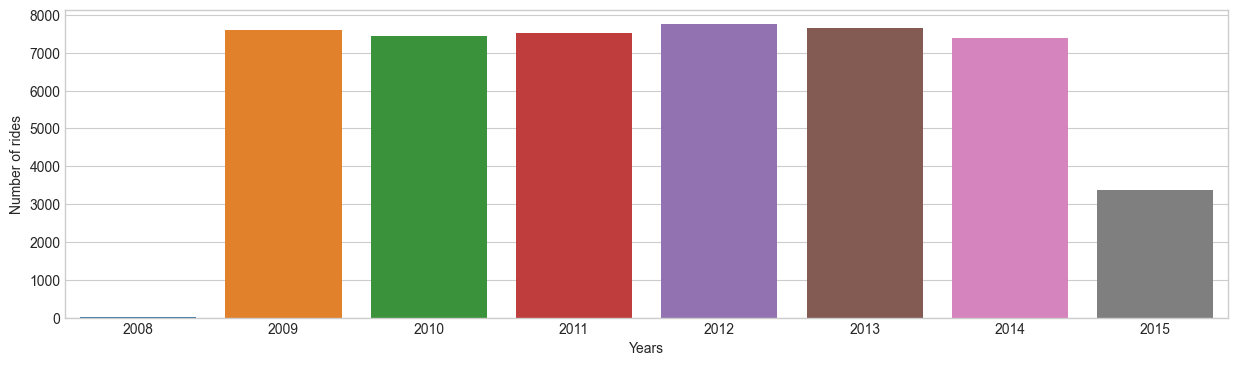

In [27]:
year_insight = df.year.value_counts()

plt.figure(figsize=(15, 4))
sns.barplot(data=df, x=year_insight.index, y=year_insight.values)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()


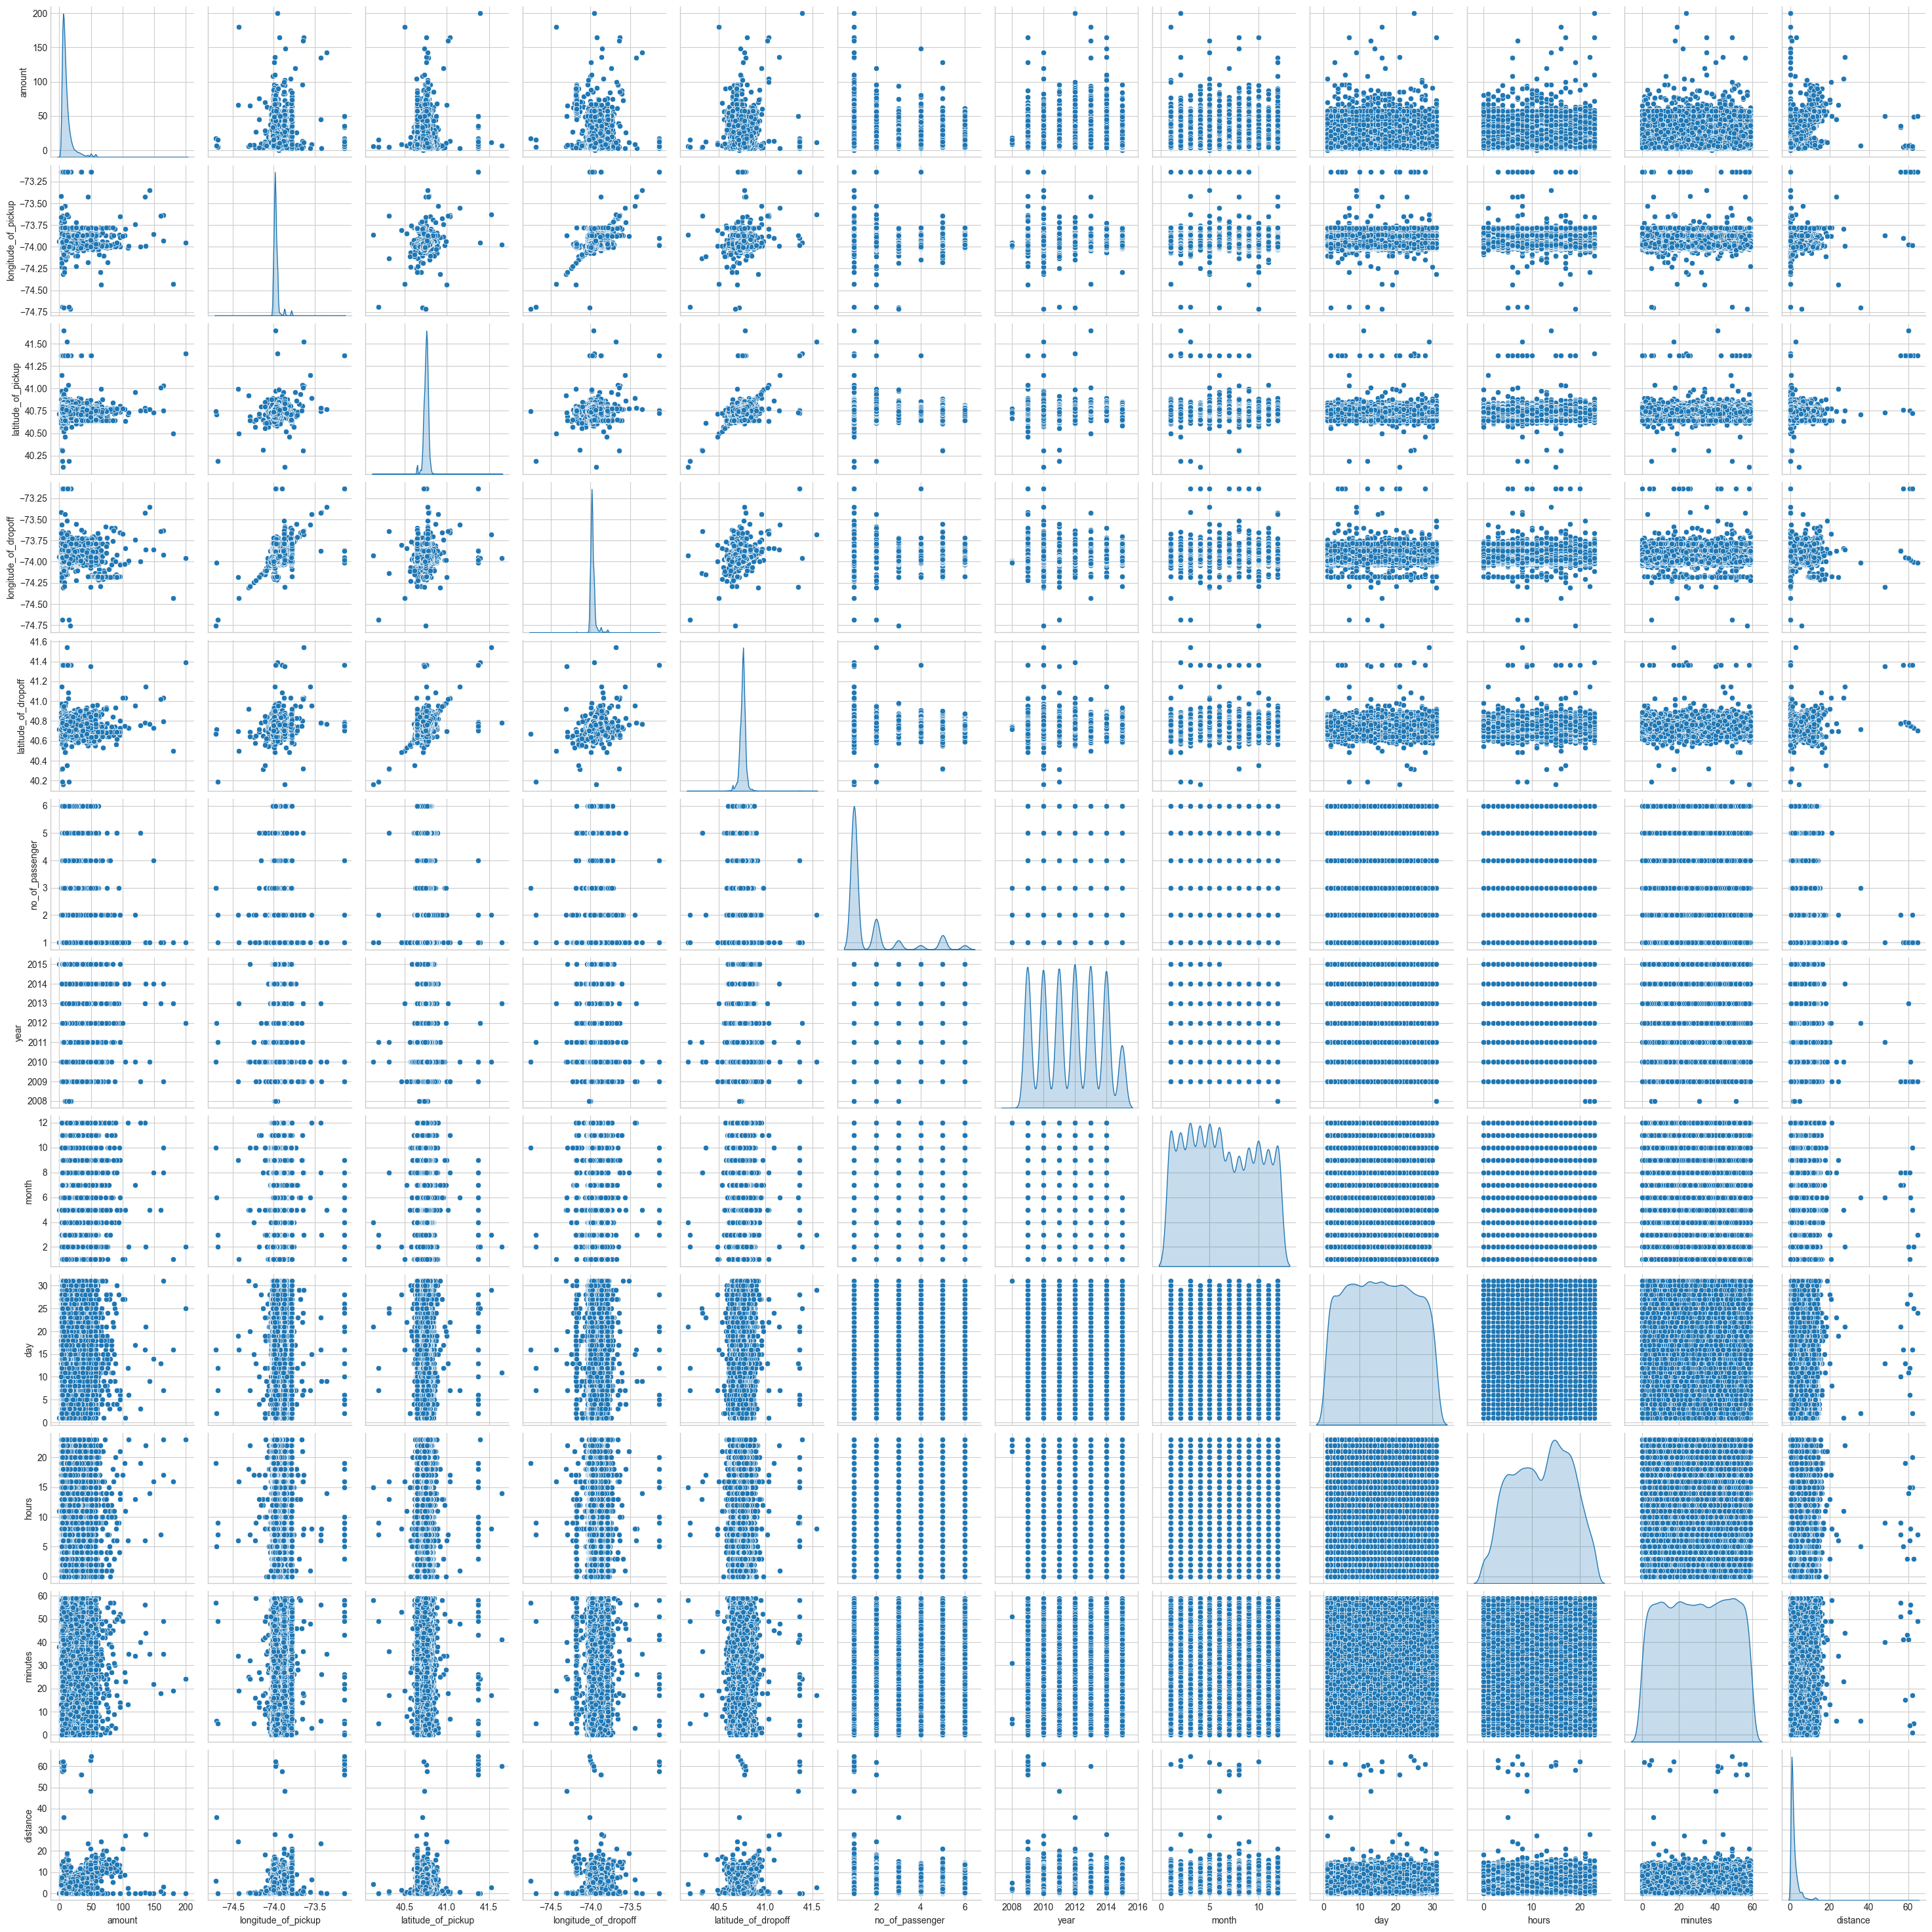

In [91]:
sns.pairplot(df,diag_kind="kde")

<AxesSubplot: title={'center': 'Correlation Heatmap'}>

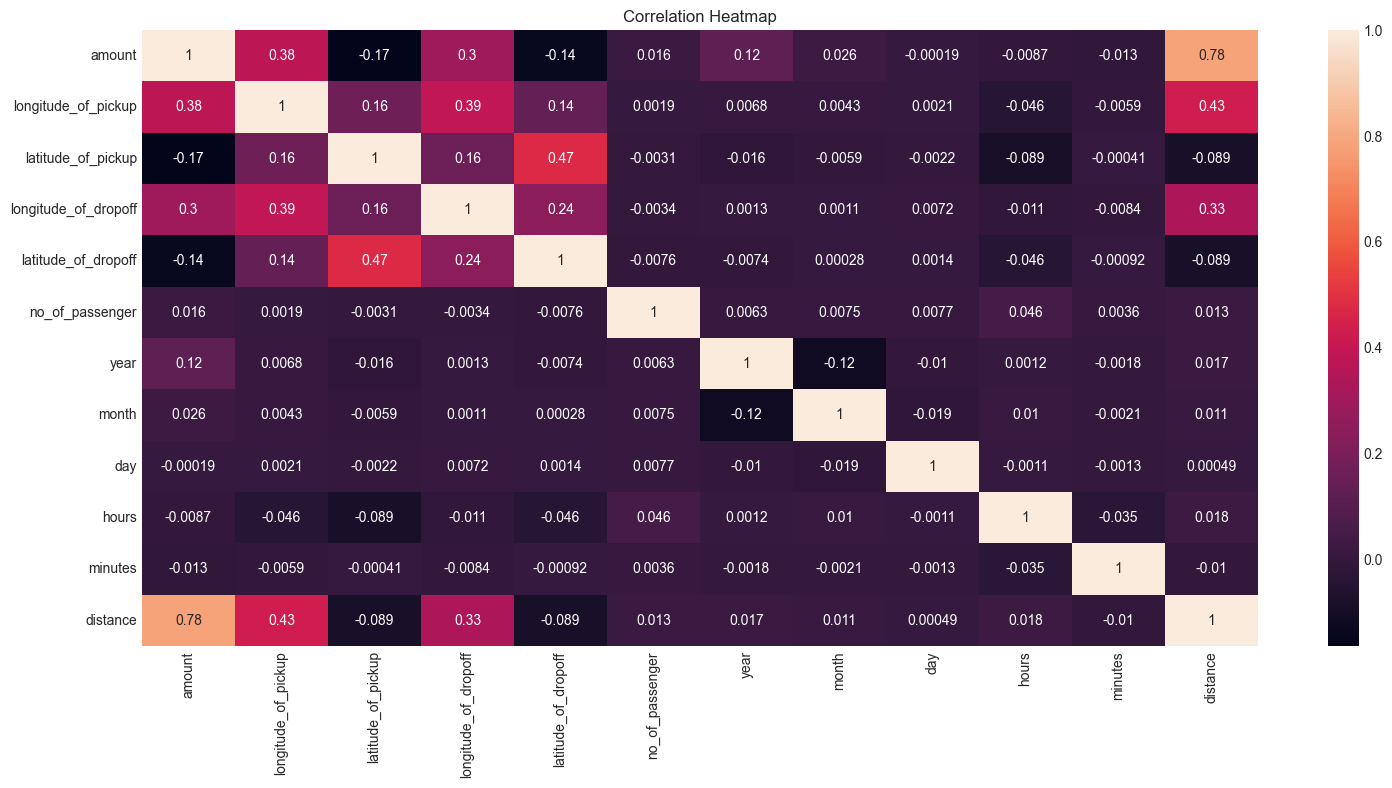

In [29]:
plt.figure(figsize = (18,8))
plt.title('Correlation Heatmap')
corr = df.corr()
corr
sns.heatmap(corr, annot = True)

**Model**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
##Fare depends on year,month,day of the motnh, distance and no. of passengers
model_data = df[['year', 'month','day','distance', 'no_of_passenger', 'amount']]

In [32]:
X=model_data[['year','month','day','distance','no_of_passenger']]#independent variable
Y=model_data[["amount"]]#dependent variable

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

**Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model_1=LinearRegression(n_jobs=5 )
model_1.fit(X_train,Y_train)

LinearRegression(n_jobs=4)

In [36]:
model_1.score(X_train,Y_train)

0.6175232251883516

In [37]:
lin_score=model_1.score(X_test,Y_test)
lin_score

0.6427778298616105

**Linear Regression with standardization**

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, Y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [39]:
model_lin.score(X_train,Y_train)

0.6175232251883517

In [40]:
from sklearn.metrics import r2_score

Y_test_pred = model_lin.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 64.0%


**KNN Regression**

In [41]:
from sklearn.neighbors import KNeighborsRegressor
model_2 = KNeighborsRegressor(n_neighbors=15)

In [42]:
model_2.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=15)

In [43]:
model_2.score(X_train,Y_train)

0.7611435968734608

In [44]:
knn_score=model_2.score(X_test,Y_test)
knn_score

0.7374765981418772

**KNN with standardization**

In [45]:
model_knn = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("knn_reg", KNeighborsRegressor()),
    ))
model_knn.fit(X_train, Y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn_reg', KNeighborsRegressor())])

In [46]:
model_knn.score(X_train,Y_train)

0.8076613664593504

In [47]:
Y_test_pred = model_knn.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 73.0%


**SVR**

In [77]:
from sklearn.svm import SVR

In [87]:
model_3=SVR(kernel='rbf',gamma='auto',C=3)

In [88]:
model_3.fit(X_train,np.ravel(Y_train))

SVR(C=3, gamma='auto')

In [89]:
model_3.score(X_train,Y_train)

0.711763700673957

In [90]:
model_3.score(X_test,Y_test)

0.6749221045254539

**SVR with standardization**

In [48]:
from sklearn.svm import SVR

In [49]:
scaler = StandardScaler()
model = SVR(kernel = 'rbf',C = 3)
pipe = Pipeline(steps=[('scaler', scaler),('model', model)])
pipe.fit(X_train,np.ravel(Y_train))

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(C=3))])

In [50]:
pipe.score(X_train,Y_train)

0.7362053208501326

In [51]:
Y_test_pred = pipe.predict(X_test)
score = r2_score(Y_test, Y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


**Decision Tree Regressor**

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
model_4=DecisionTreeRegressor(max_depth=4)

In [54]:
model_4.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4)

In [55]:
model_4.score(X_train,Y_train)

0.744261548397698

In [56]:
dtr_score=model_4.score(X_test,Y_test)
dtr_score

0.7528806301019902

**Bagging Regression**

In [57]:
from sklearn.ensemble import BaggingRegressor

In [58]:
model_5=BaggingRegressor(base_estimator=model_4,n_estimators=50)

In [59]:
model_5.fit(X_train,np.ravel(Y_train))

C:\Users\digan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                 n_estimators=50)

In [60]:
model_5.score(X_train,Y_train)

0.750875592308463

In [61]:
model_5.score(X_test,Y_test)

0.7601885506158578

**Adaboost regressor**

In [62]:
from sklearn.ensemble import AdaBoostRegressor

In [63]:
model_6=AdaBoostRegressor(n_estimators=1)

In [64]:
model_6.fit(X_train,np.ravel(Y_train))

AdaBoostRegressor(n_estimators=1)

In [65]:
model_6.score(X_train,Y_train)

0.7146799819954494

In [66]:
model_6.score(X_test,Y_test)

0.7250784749158123

**Gradient Boost Regression**

In [67]:
 from sklearn.ensemble import GradientBoostingRegressor

In [68]:
model_7=GradientBoostingRegressor()

In [69]:
model_7.fit(X_train,np.ravel(Y_train))

GradientBoostingRegressor()

In [70]:
model_7.score(X_train,Y_train)

0.797506849759971

In [71]:
model_7.score(X_test,Y_test)

0.770466643198348

**Random Forest Regression**

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
model_8=RandomForestRegressor(max_depth=6,max_features=5,n_estimators=25)

In [74]:
model_8.fit(X_train,np.ravel(Y_train))

RandomForestRegressor(max_depth=6, max_features=5, n_estimators=25)

In [75]:
model_8.score(X_train,Y_train)

0.7825217352377665

In [76]:
model_8.score(X_test,Y_test)

0.7736029762439917

**Hence,Gradient Boosting Regression give most accurate result foe the test data becaude in this case the algorithm is such that it trains the data to correct each others errors,they're capable of capturing complex patterns in the data.**